# 로지스틱 회귀: 있고 없음을 분류
- 선형 회귀의 한계점을 보완하여 만들어진 이진 분류 모델
- 독립 변수 X의 변화에 따른 종속 변수 Y가 1이 될 확률을 나타내는 함수
- 0과 1의 이분법적인 결과 뿐, 중간 값이 없다. = 일반 선형 회귀로 분류 불가능  
ex) 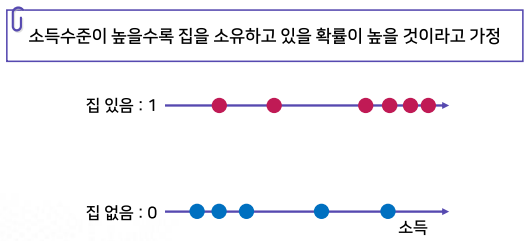
- 한계점: 선형 모형으로 분석하면 누락되는 데이터가 너무 많다.
- 한계점 극복:  
1) 확률 변환
  - 유/무가 아닌 '유'가 될 확률을 이용하여 경향성 있는 곡선으로 변환 -> 선형 회귀 모델 적용 가능
  - 단, 이때 X 값이 계속 커지면 Y 값이 1을 초과하는 문제 발생
  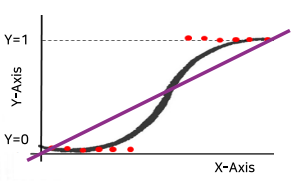
  
2) odds ratio
  - Y를 단순 확률이 아닌 두 확률의 비율(odds ratio)로 변환
  - Y 값이 1을 넘더라도 비율이기 때문에 두 확률의 비율은 절대 1을 넘지 않는다.  
  ① 종속변수 Y값이 0 또는 1일때 odds ratio를 구하는 공식
  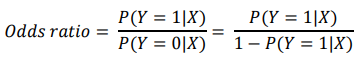
  = 독립변수 X에 대해 종속변수가 1이 될 확률과 0이 될 확률의 비율  
  ② odds ratio를 이용하여 곡선을 그리면 지수 곡선이 나온다.
  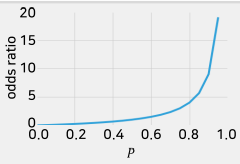
  ③ 이에 로그값을 적용하면 선형으로 변환된 곡선을 구할 수 있다.
  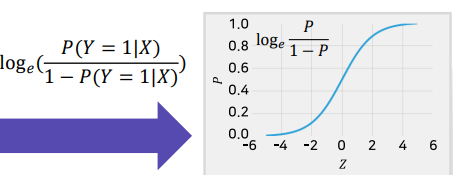
  ④ 결과적으로,
  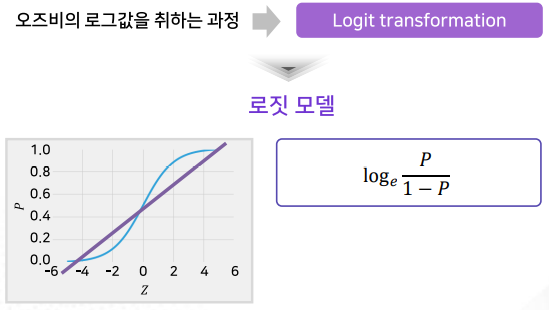

- 수식 정리
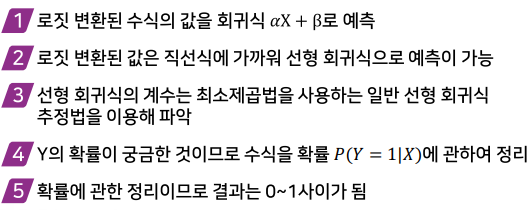
- 로짓을 쓰는 이유: 성능이 좋음 (이진 분류는 결과 클래스가 2개(0 혹은 1)만 존재할 때 사용됨)
  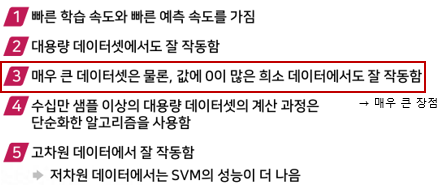

- 타겟 칼럼의 계층화(stratify): 해당 모델은 분류 모델이기에 '계층화'하는 것이 좋다.
  - stratify 옵션을 이용하고, 종속변수를 지정 -> 타겟 칼럼의 값이 분류해야 할 종류로 보는 것
  - 데이터를 분리할 때 클래스의 비율을 지켜 훈련 데이터와 검정 데이터를 분리한다.  
  ex) 만일 0 25% 1 75% 이면 데이터셋을 나눌때도 이를 유지함을 의미  

#### 5-1. 로지스틱 회귀

In [13]:
# 모든 결과물 한꺼번에 display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= "all"

In [14]:
# 필요한 모듈 로드하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 구글드라이브에서 현재 작업중인 코드로 데이터 불러오기
import pandas as pd
dataset = pd.read_csv('E:\\py_temp\\MachineLearning\\breast_cancer.csv')

# 데이터셋의 정보를 파악한다
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              569 non-null    int64
 1   uniformity_of_cell_size      569 non-null    int64
 2   uniformity_of_cell_shape     569 non-null    int64
 3   marginal_adhesion            569 non-null    int64
 4   single_epithelial_cell_size  569 non-null    int64
 5   bare_nuclei                  569 non-null    int64
 6   bland_chromatin              569 non-null    int64
 7   normal_nucleoli              569 non-null    int64
 8   mitosis                      569 non-null    int64
 9   class                        569 non-null    int64
dtypes: int64(10)
memory usage: 44.6 KB


In [15]:
# 직접 X와 Y를 할당해 준다 [열,행]
## iloc = index 를 기준으로 열 전체, 행은 0~8번 까지 X에 할당한다
## 파이썬의 인덱스 값은 0 부터 시작한다
## 파이썬의 범위는 시작점은 포함, 끝은 제외한다
### 예: 0:9 은 첫번째 값 부터 9번째값 까지
X= dataset.iloc[:,0:9]
## 10번째 값의 샘플 전체를 y에 할당한다
y= dataset.iloc[:,9]

#제대로 분리 되었는지 특성수를 확인한다
print(X.shape) # 출력: (행,열)
print(y.shape) # 출력: (행,열)

(569, 9)
(569,)


In [16]:
# 훈련데이터/테스트 데이터 분리
from sklearn.model_selection import train_test_split

# 타겟 컬럼 계층화 옵션을 사용하였다
## Breast_cancer 데이터의 클래스는 1,0 으로 정수로 표시되어 있다
# stratify 옵션으로 타겟 컬럼값을 연속성 값이 아닌 분류치로 설정한다
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)
# stratify: 지정한 데이터 비율 유지 여부
# stratify=y: 유지 = 만일 0 25% 1 75% 이면 데이터셋을 나눌때도 이를 유지함을 의미

# 제대로 분리 되었는지 특성수를 확인한다
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 9)
(143, 9)
(426,)
(143,)


In [6]:
# LOGIT 함수를 불러온다
from sklearn.linear_model import LogisticRegression

# 기본값으로 로짓 모형을 설정하고 학습한다
logreg = LogisticRegression().fit(X_train,y_train)
                            
# 분석결과를 출력한다
print("prediction:", logreg.predict(X_test)) # Test 예측값들 나열
print("Train Data score : ", round(logreg.score(X_train,y_train),3))
print("Test Data score: ", round(logreg.score(X_test, y_test),3))

prediction: [2 2 2 4 2 2 4 2 2 2 4 2 2 2 4 4 4 2 4 4 4 2 2 2 4 2 2 4 2 2 2 2 4 4 4 4 4
 2 2 2 4 2 4 2 4 2 4 2 4 2 4 4 2 2 2 2 2 2 2 4 2 2 4 2 4 4 2 2 4 2 2 2 2 4
 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 4 4 2 2 2 2 4 2 2 2 4 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 4 2 4 2 4 2 2 4 4 2 4 2 2 2 2 4 2 2 4 4 2 4 4 2 2 2 2 2 2]
Train Data score :  0.953
Test Data score:  0.923


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> Error:  
    - 모델이 최적값으로 수렴하기 전, 반복횟수 제한이 걸린다.
    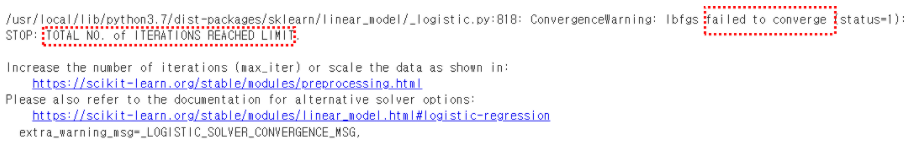
    - 모델에 커서를 올리면 파라미터 값을 확인할 수 있다.
    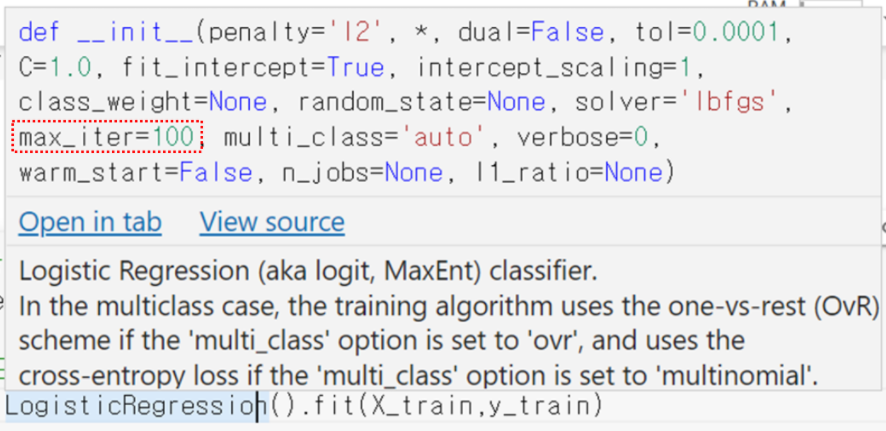
    - Max_iter 파라미터 값을 설정하고 분석한다.  
    - iteration = 반복 횟수  
    - max_iter = 최대 반복 횟수

In [11]:
# LOGIT 함수를 불러온다
from sklearn.linear_model import LogisticRegression

# 기본값으로 로짓 모형을 설정하고 학습한다
logreg = LogisticRegression(max_iter=500).fit(X_train,y_train) # max_iter = '최대반복횟수'
                            
# 분석결과를 출력한다
print("prediction:", logreg.predict(X_test)) # Test 예측값들 나열
print("Train Data score : ", round(logreg.score(X_train,y_train),3))
print("Test Data score: ", round(logreg.score(X_test, y_test),3))

prediction: [2 2 4 4 2 2 4 2 2 2 4 2 2 2 4 4 4 2 4 4 4 2 2 2 4 2 2 2 2 2 2 2 4 4 4 4 4
 2 2 2 4 2 4 2 4 2 4 2 4 2 4 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 2 2 4
 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 4 2 4 2 4 2 2 4 4 2 4 2 2 2 2 4 2 2 4 4 2 4 4 2 2 2 2 2 2]
Train Data score :  0.962
Test Data score:  0.923


> 규제 낮추기  
    - 모델의 규제를 낮추기 위하여 매개변수 c값을 높여 줌  
    - c값을 높여주면 모델은 복잡해지고, 훈련데이터에 더 맞추게 됨  
    - c의 기본값은 1.0임  

In [8]:
# 규제 조절하기
# 매개변수 조정 : c값을 높인다 -> 규제를 낮춘다 -> 모델복잡도를 높인다
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=100, max_iter=500)
# *** C= 규제 를 낮추기 위해 매개변수 C값을 높여 
# 모델은 복잡하고 훈련 데이터에 더 맞추게 된다.
logreg.fit(X_train, y_train)
                            
print("prediction:", logreg.predict(X_test))
print("Train Data score : ", round(logreg.score(X_train,y_train),3))
print("Test Data score: ", round(logreg.score(X_test, y_test),3))

# ** c값을 너무 높이면 과적합 문제가 발생할 수 있음 **

LogisticRegression(C=100, max_iter=500)

prediction: [2 2 4 4 2 2 4 2 2 2 4 2 2 2 4 4 4 2 4 4 4 2 2 2 4 2 2 2 2 2 2 2 4 4 4 4 4
 2 2 2 4 2 4 2 4 2 4 2 4 2 4 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 2 2 4
 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 4 2 4 2 4 2 2 4 4 2 4 2 2 2 2 4 2 2 4 4 2 4 4 2 2 2 2 2 2]
Train Data score :  0.965
Test Data score:  0.923


> 규제 낮추기  
    - 모델의 성능이 약간 향상되었음
    - 과대적합 문제만 발생하지 않다면 모델이 복잡할수록 좋음
    - L1 규제를 적용하려면 liblinear, L2 규제를 적용하려면 기본 solver를 사용  
    ① 모델의 규제를 L1, L2 또는 elasticnet으로 변경 가능함  
    ② 적용하는 solver에 따라 적용할 수 있는 규제가 다름  
    ③ 다양한 solver 옵션들이 존재하지만 대부분의 solver들이 무시할 정도로 성능 차이가 미비함

In [18]:
# L1으로 규제 바꾸기
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=100, max_iter=500, solver="liblinear", penalty ='l1')
# *** C= 규제 를 낮추기 위해 매개변수 C값을 높여 
# 모델은 복잡하고 훈련 데이터에 더 맞추게 된다.
logreg.fit(X_train, y_train)
                            
print("prediction:", logreg.predict(X_test))
print("Train Data score : ", round(logreg.score(X_train,y_train),3))
print("Test Data score: ", round(logreg.score(X_test, y_test),3))

LogisticRegression(C=100, max_iter=500, penalty='l1', solver='liblinear')

prediction: [4 4 2 4 2 4 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 4 4 2
 2 2 2 2 4 4 4 2 2 2 4 2 2 4 4 4 4 2 4 2 2 4 2 4 2 2 2 4 2 4 2 4 4 4 2 4 4
 4 4 2 2 4 2 2 2 2 2 4 2 2 2 2 2 4 2 2 2 2 2 4 4 4 2 2 2 4 2 2 2 4 2 4 2 4
 2 2 2 2 2 4 2 2 2 2 4 2 2 4 2 2 2 4 4 4 4 2 2 4 2 4 2 2 2 2 2 2]
Train Data score :  0.96
Test Data score:  0.937


In [9]:
# L2로 규제 바꾸기
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=100, max_iter=500, penalty ='l2')
# *** C= 규제 를 낮추기 위해 매개변수 C값을 높여 
# 모델은 복잡하고 훈련 데이터에 더 맞추게 된다.
logreg.fit(X_train, y_train)
                            
print("prediction:", logreg.predict(X_test))
print("Train Data score : ", round(logreg.score(X_train,y_train),3))
print("Test Data score: ", round(logreg.score(X_test, y_test),3))

LogisticRegression(C=100, max_iter=500)

prediction: [2 2 4 4 2 2 4 2 2 2 4 2 2 2 4 4 4 2 4 4 4 2 2 2 4 2 2 2 2 2 2 2 4 4 4 4 4
 2 2 2 4 2 4 2 4 2 4 2 4 2 4 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 2 2 4
 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 4 2 4 2 4 2 2 4 4 2 4 2 2 2 2 4 2 2 4 4 2 4 4 2 2 2 2 2 2]
Train Data score :  0.965
Test Data score:  0.923


In [17]:
# L2로 규제 바꾸기
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=100, max_iter=500, penalty ='l1')
# *** C= 규제 를 낮추기 위해 매개변수 C값을 높여 
# 모델은 복잡하고 훈련 데이터에 더 맞추게 된다.
logreg.fit(X_train, y_train)
                            
print("prediction:", logreg.predict(X_test))
print("Train Data score : ", round(logreg.score(X_train,y_train),3))
print("Test Data score: ", round(logreg.score(X_test, y_test),3))

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.